In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix




In [9]:
# Dummy Features
# Preparing Features for Analysis: Dummy-Coding, Imputation, Recombination

def create_dummies(filename, ID = False):
    class_data = pd.read_csv(filename)

    # Separating numeric and categorical variables for Dummy-coding:
    dummy_vars = ['day_of_week', 'is_weekend', 'max_screen_duration_day_part']
    dummyfeatures = class_data[dummy_vars]
    dummyfeatures = dummyfeatures.applymap(str)  # Converting to string to account for categorical AZ variables

    # Dummy-coding categorical variables:
    dummyfeatures = pd.get_dummies(dummyfeatures, dtype = float)

    # Recombine both dfs and define target variable
    if ID: # if we want to keep the ID column
        all_features = pd.concat([class_data[[col for col in class_data.columns if col not in dummy_vars]], dummyfeatures], axis = 1)
        all_features.to_csv('data/final_RNN.csv', index=False)
    else:
        all_features = pd.concat([class_data[[col for col in class_data.columns if col not in dummy_vars]], dummyfeatures], axis = 1).iloc[:,2:]
        all_features.to_csv('data/final.csv', index = False)

create_dummies('data/imputed_data_v2.csv', ID = True)

In [99]:
# Read Data
data_rnn = pd.read_csv('data/final_RNN.csv').iloc[:,1:]

# Group by ID to have ID as a thrid dimension
g = data_rnn.groupby('id').cumcount()
L = (data_rnn.set_index(['id',g]) # Set cumcount as index
       .unstack(fill_value=0) # Unstack and fill missing values with 0
       .stack().groupby(level=0) # Stack back and group by id
       .apply(lambda x: x.values.tolist()) # Convert columns to list
       .tolist()) # Make whole dataframe a list to be read by numpy into an array

tensor_rnn = np.array(L) # Convert list dataframe to numpy array
tensor_rnn = np.transpose(tensor_rnn,(1,0,2)) # Reshape to have tensor in correct format for RNN


In [ ]:
## Different Data Approach:

# Load Data non-aggregated
# Then: Check missing values 
# Group not by Date but by ID-index: First entry of individual gets a 1, last a X (But don't I do that already??)

# Sort data by ID length and batch them accordingly - try to get batches of 3 with same lengths, add padding of zeros if needed
# Include engineered features for RNN prediction??

In [ ]:
data = pd.read_csv('data/dataset_mood_smartphone.csv', index_col=0)

# dataframe without variables circumplex.arousal and circumplex.valence
data_without_arousal = data[data['variable'] != 'circumplex.arousal']

# remove valence too
data_without_circumplex = data_without_arousal[data_without_arousal['variable'] != 'circumplex.valence']

# remove rows with negative values
data_cleaned = data_without_circumplex[data_without_circumplex['value'] >= 0]

#######

all_vars = data_cleaned['variable'].unique()

for var in all_vars:
    var_mask = data_cleaned['variable'] == var
    var_df = data_cleaned[var_mask]

    old_var_mask = data['variable'] == var
    old_var_df = data[old_var_mask]

    value_range = (var_df['value'].min(), var_df['value'].max())
    mean_value = var_df['value'].mean()
    std_value = var_df['value'].std()

    # I just can't get this to work, it doesn't seem to be able to find the NA values
    num_na = old_var_df['value'].isnull().sum()
    
    num_neg = old_var_df['value'].lt(0).sum()

    print(f"Variable: {var}\t & {value_range[0]}, {value_range[1]} & {round(mean_value, 3)} & {round(std_value, 3)} & {num_na} & {num_neg}\\\\")


# get the first and last datetime values
first_time = data['time'].min()
last_time = data['time'].max()

# output the results
print("First time: ", first_time)
print("Last time: ", last_time)

# filter dataframe to only include "mood" variable
mood_df = data[data['variable'] == 'mood']

# get the first and last datetime values for "mood" variable
first_mood_time = mood_df['time'].min()
last_mood_time = mood_df['time'].max()

# output the results
print("First mood time: ", first_mood_time)
print("Last mood time: ", last_mood_time)


data_cleaned.to_csv('data/data_no_neg.csv')b

In [11]:
wide_df.groupby(['id', 'date'])['mood']

In [22]:
wide_df.head()

,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,sms,date,month,day_of_week,time_of_day,is_weekend,day_avg_mood_x,day_avg_mood_y,day_avg_mood_x,day_avg_mood_y
0,AS14.01,2014-02-26 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2014-02-26,2,3,afternoon,no,6.250000,6.250000,6.250000,6.250000
1,AS14.01,2014-02-26 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2014-02-26,2,3,afternoon,no,6.250000,6.250000,6.250000,6.250000
2,AS14.01,2014-02-26 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2014-02-26,2,3,evening,no,6.250000,6.250000,6.250000,6.250000
3,AS14.01,2014-02-26 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2014-02-26,2,3,evening,no,6.250000,6.250000,6.250000,6.250000
4,AS14.01,2014-02-27 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2014-02-27,2,4,morning,no,6.333333,6.333333,6.333333,6.333333


In [46]:
# Feature Engineering
import datetime
import yfinance as yf

data = pd.read_csv('data/dataset_mood_smartphone.csv', index_col=0)

wide_df = pd.pivot_table(data, values='value', index=['id', 'time'], columns='variable', aggfunc= 'mean').reset_index()

wide_df['datetime'] = pd.to_datetime(wide_df['time']) # Convert time column to datetime
# Feature 1, 2 and 3: Date, month and day of week
wide_df['date'] = wide_df['datetime'].dt.date  # Create new date, month, and day of week columns
wide_df['month'] = wide_df['datetime'].dt.month
wide_df['day_of_week'] = wide_df['datetime'].dt.dayofweek + 1 # Adding 1 to make Monday = 1, Sunday = 7
# Convert month and day_of_week to categorical values
wide_df['month'] = pd.Categorical(wide_df['month'], categories=range(1,13))
wide_df['day_of_week'] = pd.Categorical(wide_df['day_of_week'], categories=range(1,8))

# Create temporary variable rime of day
hour = wide_df['datetime'].dt.hour
conditions = [
    (hour >= 0) & (hour < 6),   # Night
    (hour >= 6) & (hour < 12),  # Morning
    (hour >= 12) & (hour < 18), # Afternoon
    (hour >= 18) & (hour <= 23) # Evening
]
choices = ['night', 'morning', 'afternoon', 'evening']

wide_df['time_of_day'] = np.select(conditions, choices)

# Create feature 'is_weekend' to indicate if a day is a weekend or not
wide_df['is_weekend'] = wide_df['day_of_week'].apply(lambda x: 'yes' if x in (6, 7) else 'no')

# Create target variable: next_day_mood ATTENTION: Has to be averaged by next day
day_avg_mood = wide_df.groupby(['id', 'date'])['mood'].mean().reset_index(name = "day_avg_mood")
day_avg_mood['next_day_mood'] = day_avg_mood['day_avg_mood'].shift(-1)
wide_df = pd.merge(wide_df, day_avg_mood, how = 'left', on = ['id', 'date'])

# Now drop all mood NaN values and drop last entry of each individual
wide_df = wide_df.dropna(subset=['next_day_mood'])
wide_df = wide_df.groupby('id').apply(lambda x: x.iloc[:-1])

# Add weather data
weather_data = pd.read_csv('data/weather_schiphol.csv')  #https://daggegevens.knmi.nl/klimatologie/daggegevens
weather_data.rename(columns={'YYYYMMDD': 'date', 'TX': 'temp', 'SQ': 'sun_hours', 'SP' : 'sun_percentage' , 'RH': 'rain', 'NG': 'clouds'}, inplace=True)
weather_data['date'] = pd.to_datetime(weather_data['date'], format='%Y%m%d').shift(1)
wide_df['date'] = pd.to_datetime(wide_df['date'])
wide_df = pd.merge(wide_df, weather_data[['date', 'temp', 'sun_hours', 'sun_percentage', 'rain', 'clouds']], on=['date'], how='left')
wide_df['rain_weather_interaction'] = wide_df['rain'] * wide_df['appCat.weather']
wide_df['sun_weather_interaction'] = wide_df['sun_hours'] * wide_df['appCat.weather'] * wide_df['sun_percentage']

# Add SP500 data
start_date = datetime.date(2014, 2, 16)
end_date = datetime.date(2014, 6, 9)
sp500 = yf.download('^GSPC', start=start_date, end=end_date + datetime.timedelta(days=1))
sp500['SP500 Change'] = sp500['Adj Close'].pct_change()
sp500.reset_index(inplace=True)
sp500.rename(columns={'Date': 'date'}, inplace=True)

wide_df = pd.merge(wide_df, sp500[['date', 'SP500 Change']], on=['date'], how='left')
wide_df['Stock_App_SP500_interaction'] = wide_df['SP500 Change'] * wide_df['appCat.finance']
wide_df['Circumplexity_Interaction'] = wide_df['circumplex.valence'] * wide_df['circumplex.arousal']

wide_df.to_csv('data/wide_df_rnn.csv', index = False)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Sort individuals by count of entries

count_data = pd.merge(wide_df, pd.DataFrame(wide_df.groupby('id')['id'].count().reset_index(name = "count")), how = 'left', on = 'id').sort_values(['a', 'b'], ascending=[True, False])
count_data.head

In [47]:
## Imputation of missing values

SHOW = False

## IMPUTING MISSING VALUES
# impute missing values: forward fill
data = pd.read_csv('data/wide_df_rnn.csv')
data_ffill = data
data_ffill[['circumplex.arousal', 'circumplex.valence', 'activity']] = data[['circumplex.arousal', 'circumplex.valence', 'activity']].fillna(method='ffill')
data_ffill[['Circumplexity_Interaction']] = data[['Circumplexity_Interaction']].fillna(method='ffill')


# create datetimeindex from time column in order to be able to interpolate using the time method
datetimeindex = pd.to_datetime(data['date'])

# replace time column with datetimeindex
data.index = datetimeindex


# interpolate using time method
data_interpolated = data
data_interpolated[['circumplex.arousal', 'circumplex.valence', 'activity']] = data[['circumplex.arousal', 'circumplex.valence', 'activity']].interpolate(method='time')
data_interpolated[['Circumplexity_Interaction']] = data[['Circumplexity_Interaction']].interpolate(method='time')


# reset index back to what it was
new_index = pd.Index(range(0, len(data_interpolated)))
data_interpolated.index = new_index
data_ffill.index = new_index

data_ffill = data_ffill.fillna(0)
data_interpolated = data_interpolated.fillna(0)

# save imputed data
data_ffill.to_csv('data/rnn_imputed_data_v1.csv')
data_interpolated.to_csv('data/rnn_imputed_data_v2.csv')
#  NOW WRITE SOME ABOUT THE PROS AND CONS

In [ ]:
## Dummy Coding 

def create_dummies(filename, ID = False):
    class_data = pd.read_csv(filename)

    # Separating numeric and categorical variables for Dummy-coding:
    dummy_vars = ['day_of_week', 'is_weekend', 'month']
    dummyfeatures = class_data[dummy_vars]
    dummyfeatures = dummyfeatures.applymap(str)  # Converting to string to account for categorical AZ variables

    # Dummy-coding categorical variables:
    dummyfeatures = pd.get_dummies(dummyfeatures, dtype = float)

    # Recombine both dfs and define target variable
    if ID: # if we want to keep the ID column
        all_features = pd.concat([class_data[[col for col in class_data.columns if col not in dummy_vars]], dummyfeatures], axis = 1)
        all_features.to_csv('data/final_RNN.csv')
    else:
        all_features = pd.concat([class_data[[col for col in class_data.columns if col not in dummy_vars]], dummyfeatures], axis = 1).iloc[:,2:]
        all_features.to_csv('data/final.csv')

create_dummies('data/imputed_data_v2.csv', ID = False)
create_dummies('data/imputed_data_v2.csv', ID = True)


In [43]:
## Define RNN

class Mood_RNN(nn.Module):
    def __init__(self, num_layers, hidden_size, batch_size):
        super().__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.batch_size = batch_size
        self.num_features = 62
        self.num_classes = 10
        self.rnn = nn.RNN(self.num_features, hidden_size, num_layers)
        self.fc = nn.Linear(hidden_size, self.num_classes)
        
    def forward(self, x, hidden_state):
        output, new_hidden = self.rnn(x, hidden_state) # run RNN on input and hidden state
        output_rnn = output.contiguous().view(-1, self.hidden_size) # reshape output to (whatever, hidden_size)
        output_fc = self.fc(output_rnn) # run RNN output through fully connected layer
        return output_fc, new_hidden

    def init_hidden(self, batch_size):
        return torch.zeros(self.num_layers, batch_size, self.hidden_size)


In [ ]:
## Which columns to drop

In [207]:
## First Train Loop 
batch_size = 3
num_epochs = 100

input_tensor = torch.from_numpy(np.delete(tensor_rnn, 23, axis = 2)[:,:,2:].astype(float)).to(torch.float32) # Select input features and transform to torch tensor
target_tensor = torch.from_numpy(tensor_rnn[:,:,23].astype(float)).to(torch.float32) # Select target and transform to torch tensor
        
mood_RNN = Mood_RNN(5, 10, batch_size)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mood_RNN.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mood_RNN.parameters(), lr=0.005, momentum=0.9)

loss_list = []

for epoch in range(num_epochs): 
                    
    for i in range(0, input_tensor.shape[1], batch_size):    
        inputs = input_tensor[:,i:i+batch_size,:].to(device)
        targets = target_tensor[:,i:i+batch_size].to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        hidden_state = mood_RNN.init_hidden(batch_size).to(device) # Reinitialize hidden state for every new sequence / sequence batch
        outputs, hidden_state = mood_RNN(inputs, hidden_state)

        loss = criterion(outputs, targets.reshape(-1).long()) # Reshape targets such that it fits the output's shape (why is this 67*3 tho?)
        loss_list.append(loss.item())
        loss.backward(retain_graph=True)
        optimizer.step()
        

# Plot lineplot of loss_list:
plt.plot(loss_list)
        

<function matplotlib.pyplot.show(close=None, block=None)>

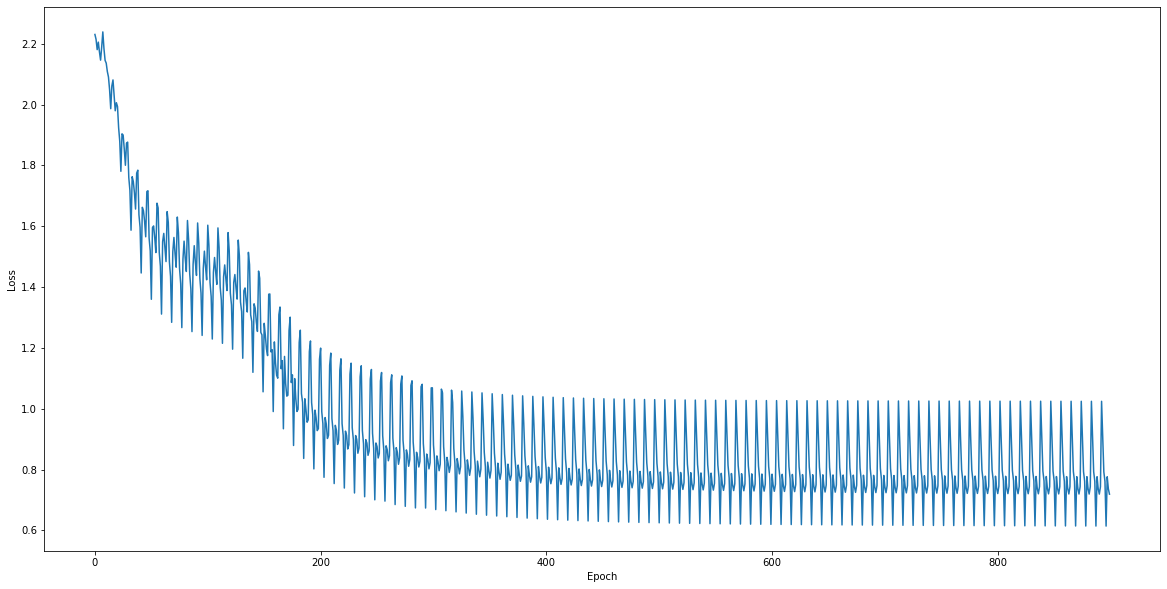

In [208]:
plt.figure(figsize = (20,10))
plt.plot(loss_list)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show

In [210]:
total_train = 0
correct_train = 0
f1_list = []

with torch.no_grad():
    
    for i in range(0, input_tensor.shape[1], batch_size):    
        inputs = input_tensor[:,i:i+batch_size,:].to(device)
        targets = target_tensor[:,i:i+batch_size].to(device)
        
        inputs, targets = inputs.to(device), targets.to(device)

        # calculate outputs by running images through the network
        outputs, hidden_state = mood_RNN(inputs, hidden_state)
        
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total_train += targets.flatten().size(0)
        correct_train += (predicted == targets.flatten()).sum().item()
        f1_list.append(f1_score(targets.to(torch.int64).flatten(), predicted, average = 'weighted'))

    print("Accuracy: %.5f, Avg F1-Score: %.5f"%((correct_train / total_train), np.mean(f1_list)))

Accuracy: 0.43339, Avg F1-Score: 0.56464


In [ ]:

f1_score(targets.to(torch.int64).flatten(), predicted, average = 'weighted')


In [ ]:
# Hyperparameter Tuning: 

# Number hidden layers
# Hidden size
# tanh vs. relu
# Bias
# Dropout
# Learning Rate


learning_rate = [0.0005, 0.001, 0.01]
momentum = [0.9, 0.95]


###Define the grid of parameters to search
hyper_grid = {'learning_rate': learning_rate,
              'momentum': momentum}

hpts = ParameterGrid(hyper_grid)

results_dict_tune = {}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for param_run, params in enumerate(hpts):
    
    lr = params['learning_rate']
    mom = params['momentum']
    net = Net()
    net.to(device)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=mom)

    loss_list = list()

    for epoch in range(10): 

        for i, data in tqdm(enumerate(trainloader, 0)):
            # get the inputs; data is a list of [inputs, labels]
            
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss_list.append(loss.item())
            loss.backward()
            optimizer.step()

            # print statistics
    
    correct_train = 0
    total_train = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in trainloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)

            # calculate outputs by running images through the network
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
            
    train_acc = correct_train / total_train
    
    correct_val = 0
    total_val = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)

            # calculate outputs by running images through the network
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
    
    val_acc = correct_val / total_val

    print(f'Training Accuracy with lr {lr} and mom {mom}: {train_acc}')
    print(f'Validation Accuracy with lr {lr} and mom {mom}: {val_acc}')

    results_dict_tune[param_run] = [train_acc, val_acc, loss_list]

print('Finished Training')

with open('/content/gdrive/My Drive/tuning_results.pkl', 'wb') as f:
    pickle.dump(results_dict_tune, f)